
### Importing Libraries


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
df_train = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS559_Applications_of_ML/Project/train_data.csv')
# Display the shape of the dataframe to understand its dimensions (rows, columns)
df_train.shape

(5807, 97)

Data Preprocessing

In [95]:
# Display information about the DataFrame `df_train`
# This includes the number of entries, columns, non-null values, data types, and memory usage
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

In [96]:
null_sum = df_train.isnull().sum()
# Print the values of the null_sum Series, which represent the count of missing values for each column in the DataFrame
print(null_sum.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
# Checking for duplicates
df_train.duplicated().sum()

0

In [98]:
# Extract the 'Index' column from the DataFrame `df_train` and assign it to the variable `index`
target = df_train['Bankrupt?']
index = df_train['Index']
df_train = df_train.drop(columns=['Bankrupt?','Index'])

Bankrupt?
0    5609
1     198
Name: count, dtype: int64


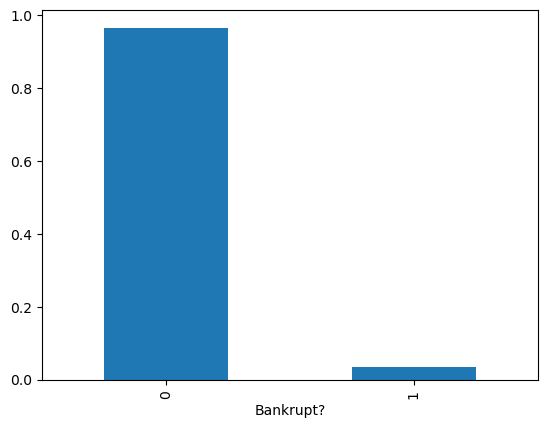

In [99]:
# Plot the normalized value counts of the target variable 'Bankrupt?' as a bar chart
target.value_counts(normalize=True).plot(kind='bar')

# Print the absolute value counts of the target variable 'Bankrupt?'
print(target.value_counts())

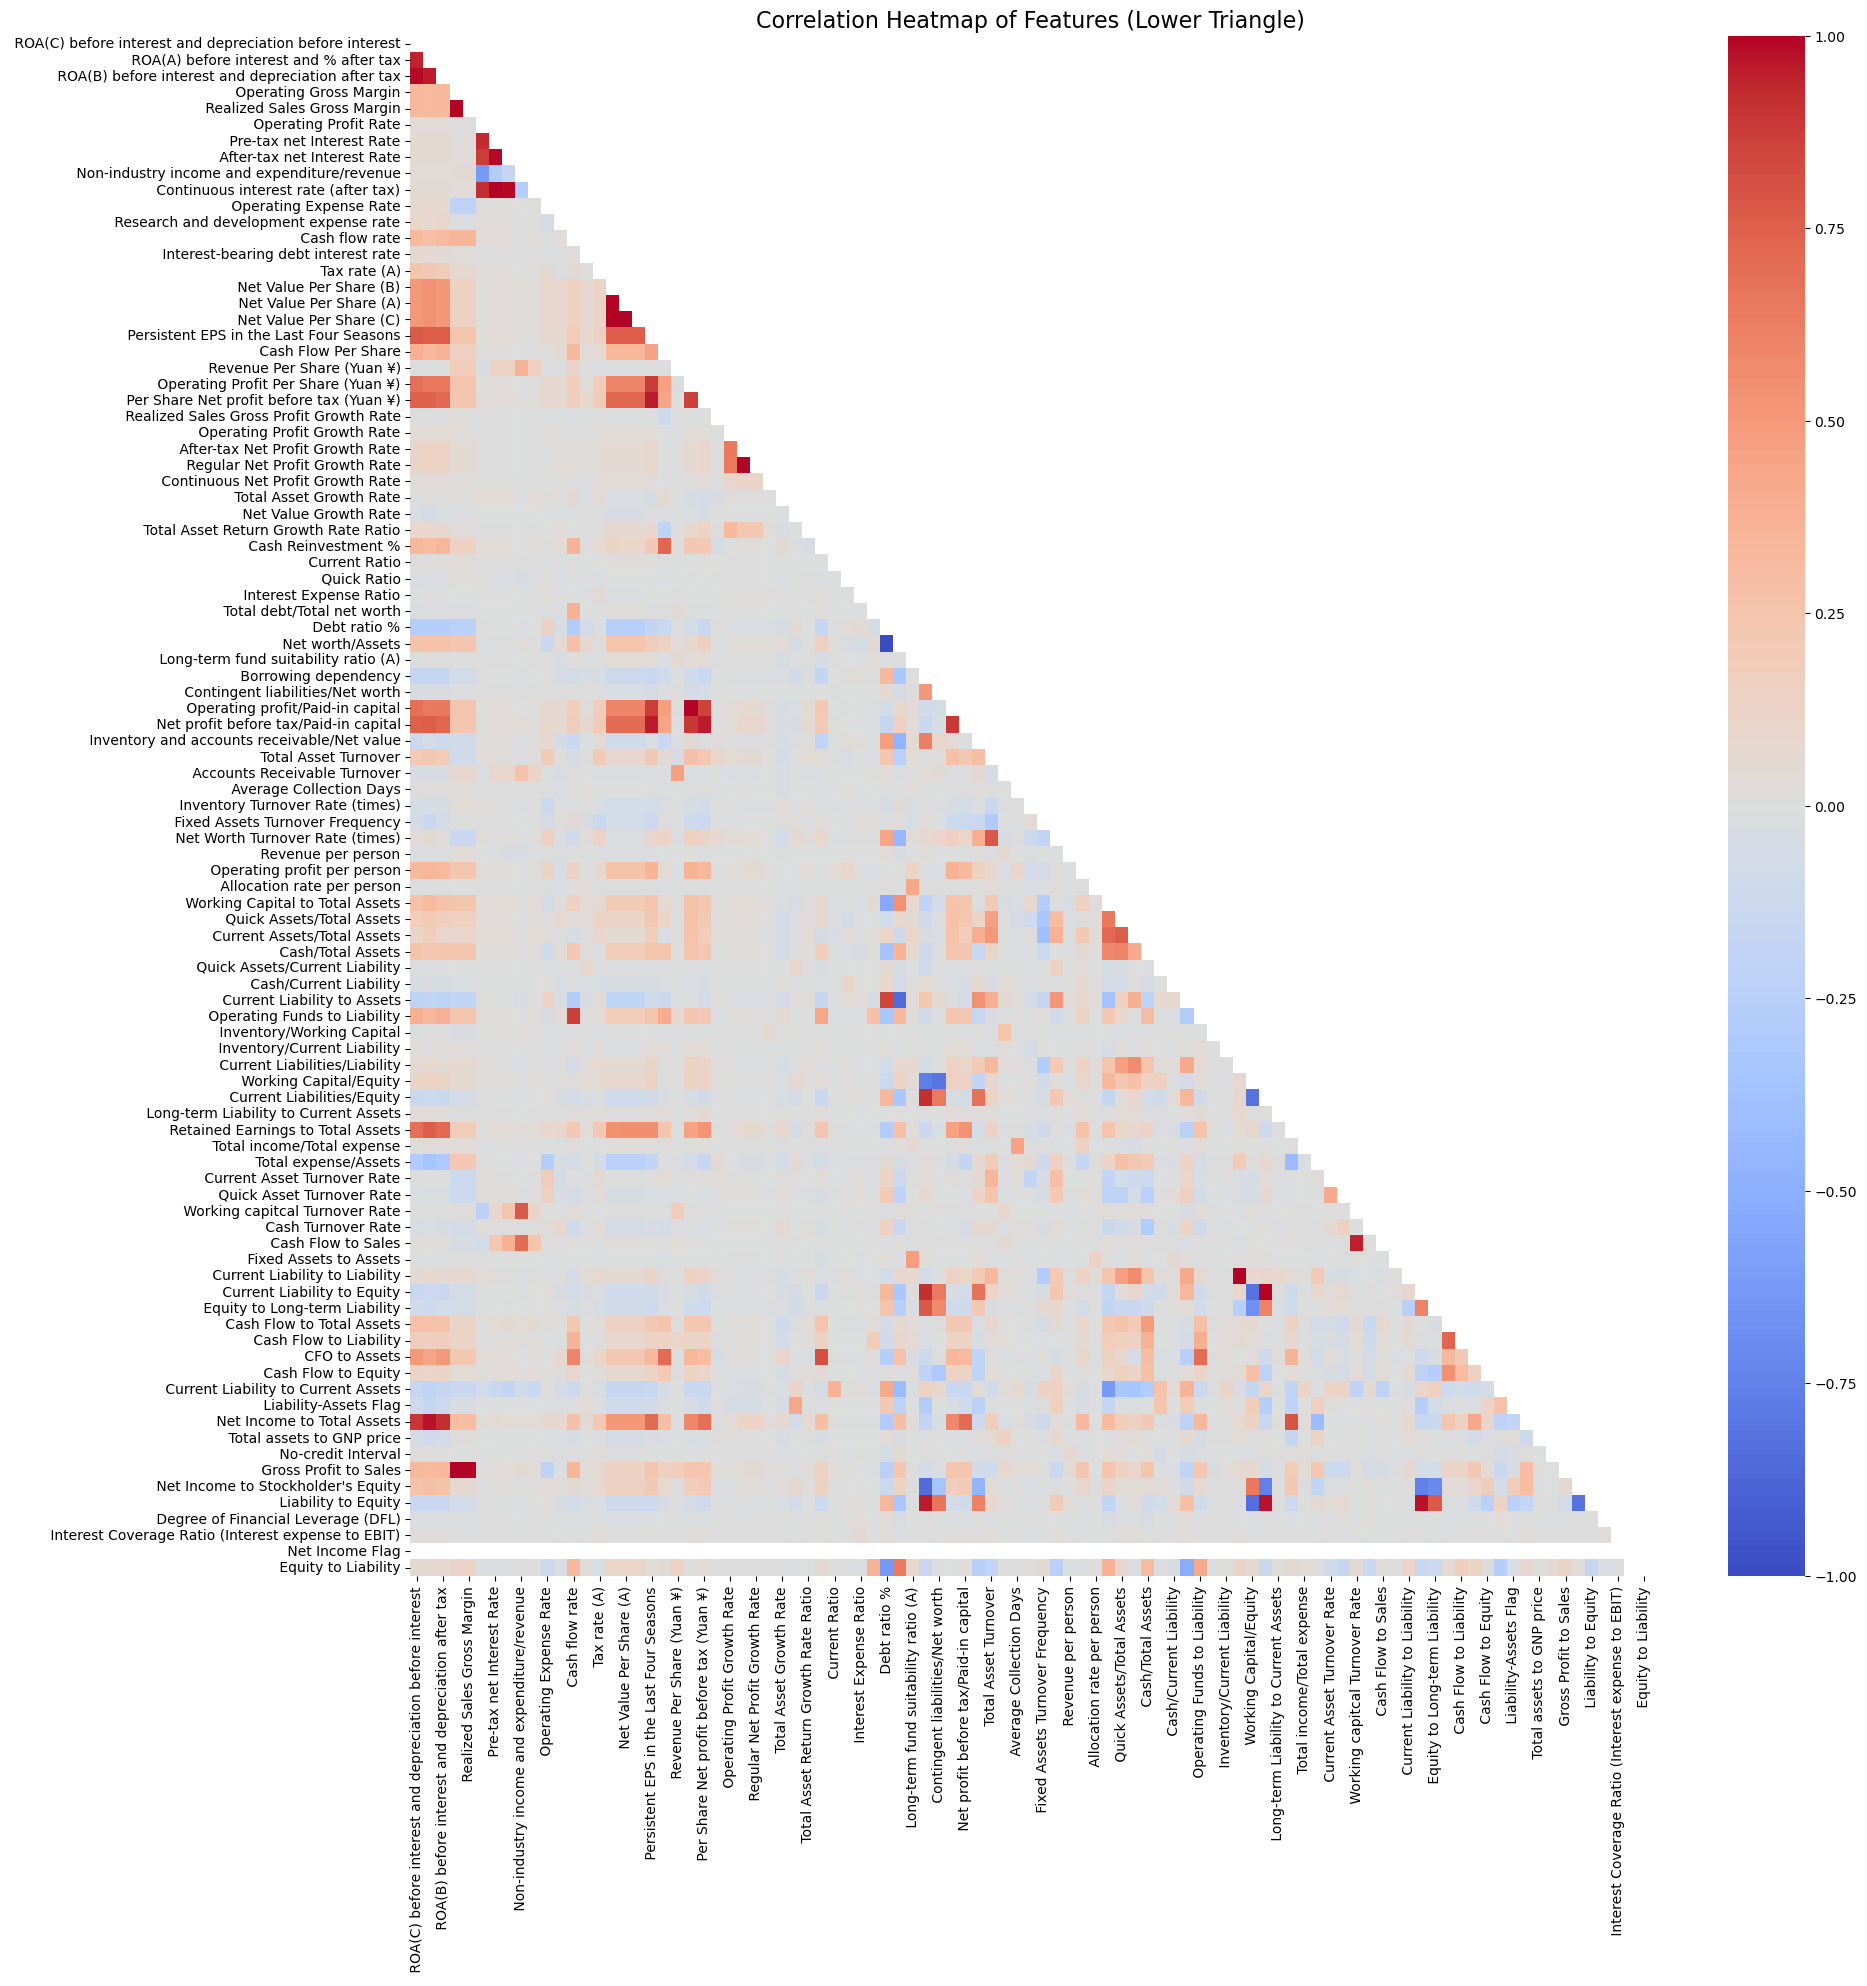

In [100]:
# Compute the correlation matrix
corr = df_train.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Lower Triangle)", fontsize=16)
plt.show()

In [101]:
# Identify features with high correlation
# Initialize an empty set to store the names of highly correlated features
high_corr_features = set()

# Iterate through the correlation matrix to find pairs of features with correlation > 0.95
for i in range(len(corr.columns)):
    for j in range(i):
        # If the absolute correlation value is greater than 0.95, add the feature name to the set
        if abs(corr.iloc[i, j]) > 0.95:
            colname = corr.columns[i]
            high_corr_features.add(colname)

# Drop the highly correlated features from the DataFrame
df_train_reduced = df_train.drop(columns=high_corr_features)

joblib.dump(high_corr_features, 'high_corr_features.pkl')
# Display the shape of the reduced DataFrame to verify the number of remaining features
df_train_reduced.shape

(5807, 78)

### Normalisation

In [102]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to the reduced training dataset and transform it
df_train_scaled = scaler.fit_transform(df_train_reduced)

# Convert the scaled data back into a DataFrame with the same column names as the original reduced dataset
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train_reduced.columns)

# Display the first few rows of the scaled DataFrame to verify the transformation
df_train_scaled.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-0.904871,-0.835696,-0.761144,0.012766,0.007361,-0.017110,1.856870,-0.758891,-0.281113,-0.150614,...,0.184105,-0.053879,-0.03474,-0.048669,-0.041164,-0.099581,-0.059112,-0.010488,0.0,-0.311418
1,0.404409,0.213147,-0.129318,0.023594,0.023322,-0.011640,-0.616797,-0.654832,-0.164360,-0.150614,...,0.049888,-0.183567,-0.03474,-0.048669,0.014686,0.094670,-0.057962,-0.005295,0.0,-0.311863
2,1.081097,0.933137,0.246730,0.031010,0.033640,-0.009133,-0.616797,0.863207,0.296969,-0.150614,...,0.476952,-0.411612,-0.03474,-0.048669,0.132551,0.186957,-0.056579,0.000788,0.0,-0.299792
3,-0.362077,-0.033493,-0.315077,0.021986,0.019382,-0.015660,1.708635,-0.758891,-0.870563,-0.150614,...,0.214430,0.093710,-0.03474,-0.048669,-0.251454,0.096120,-0.034414,0.079062,0.0,-0.659240
4,0.081298,-0.329129,-0.453469,0.020124,0.015553,-0.018851,1.319519,0.143975,-0.307893,-0.150614,...,-0.397512,-0.003918,-0.03474,-0.048669,-0.003868,-0.006053,-0.050867,0.024184,0.0,-0.384941


In [103]:
df_train_scaled.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5.807000e+03,...,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.0,5.807000e+03
mean,-5.298175e-16,1.563757e-15,6.093513e-16,1.125709e-16,-3.720958e-15,-3.010048e-16,-4.404949e-17,0.000000,7.341582e-17,-8.565178e-18,...,-2.104587e-15,-6.117985e-18,1.529496e-18,-1.223597e-18,2.506538e-15,-1.206956e-14,-2.202474e-17,-3.708722e-15,0.0,1.223597e-17
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,0.0,1.000086e+00
min,-8.312365e+00,-8.513924e+00,-3.474590e+01,-7.090136e+01,-5.806412e+01,-2.603471e+01,-6.167970e-01,-0.758891,-2.684757e+01,-1.506142e-01,...,-2.396208e+01,-9.936190e-01,-3.474042e-02,-4.866870e-02,-2.129916e+01,-5.441227e+01,-2.465301e+00,-4.840770e+01,0.0,-9.733730e-01
25%,-4.727205e-01,-3.536267e-01,-4.291678e-01,1.726556e-02,1.415239e-02,-1.905784e-02,-6.167970e-01,-0.758891,-3.417536e-01,-1.506142e-01,...,-2.019195e-01,-4.270887e-01,-3.474042e-02,-4.866870e-02,-4.115844e-02,-1.848824e-02,-5.884214e-02,-9.259608e-03,0.0,-4.759373e-01
50%,-3.816461e-02,1.550288e-02,-1.136665e-01,2.102660e-02,1.981523e-02,-1.398135e-02,-6.167970e-01,-0.551155,-1.421076e-01,-1.506142e-01,...,-5.500319e-02,-1.255796e-01,-3.474042e-02,-4.866870e-02,-1.563461e-02,4.978190e-02,-5.729926e-02,-1.174794e-03,0.0,-2.864638e-01
75%,4.934047e-01,4.618632e-01,3.371378e-01,2.616982e-02,2.820861e-02,-8.842704e-03,6.771684e-01,0.583931,2.000120e-01,-1.506142e-01,...,1.555392e-01,2.137834e-01,-3.474042e-02,-4.866870e-02,1.442154e-02,1.259662e-01,-4.779581e-02,3.964440e-02,0.0,1.153505e-01
max,8.134212e+00,6.719627e+00,2.240596e+01,9.046420e-02,1.477169e+01,5.969367e+01,2.468338e+00,3.059161,3.057679e+01,9.098757e+00,...,5.194156e+01,3.041635e+01,2.878492e+01,2.645109e+01,3.906546e+01,1.033289e+01,4.609939e+01,1.470544e+01,0.0,1.779909e+01


### Feature Selection

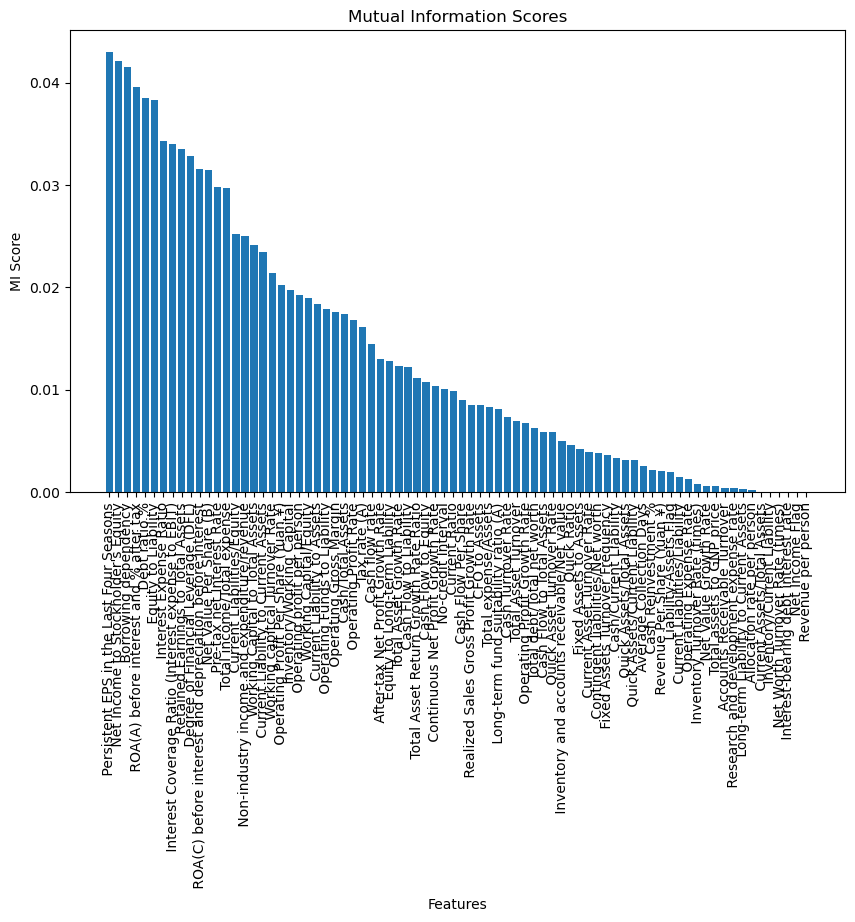

In [104]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores between features and the target variable
mi_score = mutual_info_classif(df_train_scaled, target, random_state=42)

# Create a DataFrame to store features and their corresponding MI scores
mi_df = pd.DataFrame({
    "Feature": df_train_scaled.columns,  # Feature names
    "MI SCORE": mi_score                # Corresponding MI scores
}).sort_values(by="MI SCORE", ascending=False)  # Sort by MI scores in descending order

# Plotting the mutual information scores
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(mi_df["Feature"], mi_df["MI SCORE"])  # Create a bar plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Mutual Information Scores")  # Set the plot title
plt.xlabel("Features")  # Label for the x-axis
plt.ylabel("MI Score")  # Label for the y-axis
plt.show()  # Display the plot

In [105]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_df.sort_values(by="MI SCORE", ascending=False))

# Drop rows where "MI SCORE" is less than 0.02
mi_02 = mi_df[mi_df["MI SCORE"] >= 0.02]

                                              Feature  MI SCORE
12            Persistent EPS in the Last Four Seasons  0.042984
73                 Net Income to Stockholder's Equity  0.042080
30                               Borrowing dependency  0.041486
1              ROA(A) before interest and % after tax  0.039551
28                                       Debt ratio %  0.038502
77                                Equity to Liability  0.038314
26                             Interest Expense Ratio  0.034304
75   Interest Coverage Ratio (Interest expense to ...  0.034044
56                  Retained Earnings to Total Assets  0.033529
74                 Degree of Financial Leverage (DFL)  0.032861
0    ROA(C) before interest and depreciation befor...  0.031608
11                            Net Value Per Share (B)  0.031466
4                           Pre-tax net Interest Rate  0.029804
57                         Total income/Total expense  0.029674
54                         Current Liabi

### Clustering Data

In [106]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Initialize KMeans clustering with 8 clusters, a fixed random state for reproducibility, and 10 initializations
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)

# Initialize Gaussian Mixture Model (GMM) with 8 components and a fixed random state for reproducibility
gmm = GaussianMixture(n_components=8, random_state=42)

In [107]:
# Drop columns from `df_train_scaled` that are not in the list of features with MI scores >= 0.02
# The list of features is obtained from the "Feature" column of the `mi_02` DataFrame
df_less_features = df_train_scaled.drop(columns=[col for col in df_train_scaled.columns if col not in mi_02["Feature"].values])

# Display the shape of the resulting DataFrame `df_02` to verify the number of rows and columns
df_less_features.shape


(5807, 20)

In [108]:
joblib.dump(scaler, "data_trainin_scaler.pkl")

['data_trainin_scaler.pkl']

### Removing outliers

In [109]:
# Create a mask to filter rows where all feature values have an absolute z-score less than or equal to 3
z_score_mask = (df_less_features.applymap(abs) <= 3).all(axis=1)

# Filter the DataFrame `df_02` to include only rows that satisfy the z-score condition
df_02 = df_less_features[z_score_mask]

# Filter the target variable `target` to include only rows that satisfy the z-score condition
target_02 = target[z_score_mask]

# Filter the index variable `index` to include only rows that satisfy the z-score condition
index_02 = index[z_score_mask]

# Print the shape of the filtered target variable
print(target_02.shape)

# Print the shape of the filtered DataFrame
print(df_02.shape)

# Print the shape of the filtered index variable
print(index_02.shape)

(5314,)
(5314, 20)
(5314,)


C:\Users\abdul\AppData\Local\Temp\ipykernel_23396\1263468544.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  z_score_mask = (df_less_features.applymap(abs) <= 3).all(axis=1)


In [110]:
# Export the reduced featured training data to a CSV file
df_02.to_csv('20_featured_training_data.csv', index=False)

# Export the list of columns used in `df_02` to a pickle
joblib.dump(df_02.columns.tolist(), 'df_02_columns.pkl')

# Confirm the export
print("20 featured training data exported successfully.")

20 featured training data exported successfully.


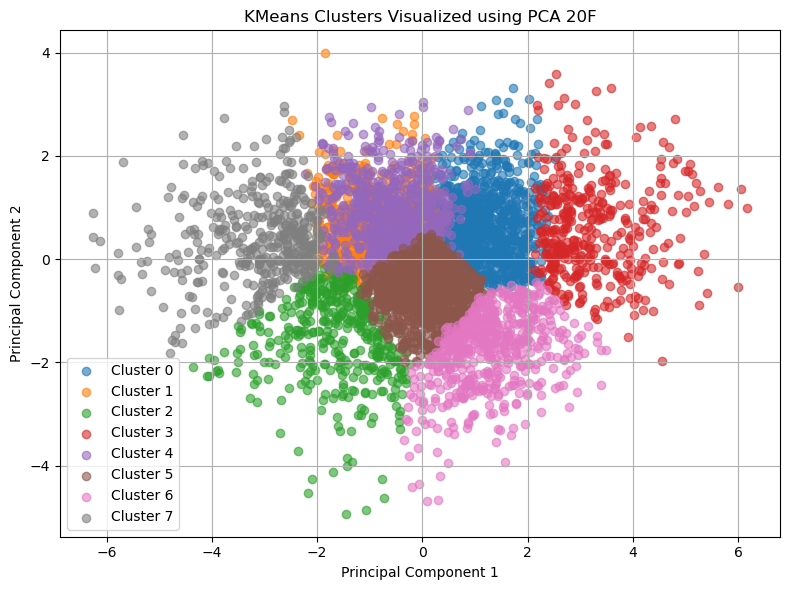

In [111]:
model_km_02 = kmeans.fit_predict(df_02)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_02)

# Add cluster labels to the PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_km_02  # Cluster labels from KMeans

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("KMeans Clusters Visualized using PCA 20F")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
#Attach cluster labels and summarize
cleaned_clustered_df = df_train.loc[df_02.index].copy()
cleaned_clustered_df["Cluster"] = model_km_02

# Reattachinng the 'Bankrupt' column to the cleaned_clustered_df DataFrame
cleaned_clustered_df["Bankrupt?"] = target_02.values
cleaned_clustered_df["Index"] = index_02.values

# Summary of clusters
kmeans_summary_02 = cleaned_clustered_df.groupby("Cluster")["Bankrupt?"].value_counts().unstack(fill_value=0)
kmeans_summary_02.columns = ["Not Bankrupt (y=0)", "Bankrupt (y=1)"]
kmeans_summary_02["Total"] = kmeans_summary_02.sum(axis=1)
kmeans_summary_02["Bankruptcy Rate (%)"] = (kmeans_summary_02["Bankrupt (y=1)"] / kmeans_summary_02["Total"]) * 100

# Display the KMeans Cluster Summary using pandas
from IPython.display import display
display(kmeans_summary_02)
print(cleaned_clustered_df.shape)

,Not Bankrupt (y=0),Bankrupt (y=1),Total,Bankruptcy Rate (%)
Cluster,,,,
0,910,0,910,0.000000
1,817,24,841,2.853746
2,409,12,421,2.850356
3,398,0,398,0.000000
4,704,26,730,3.561644
5,1027,4,1031,0.387973
6,569,0,569,0.000000
7,329,85,414,20.531401


(5314, 98)


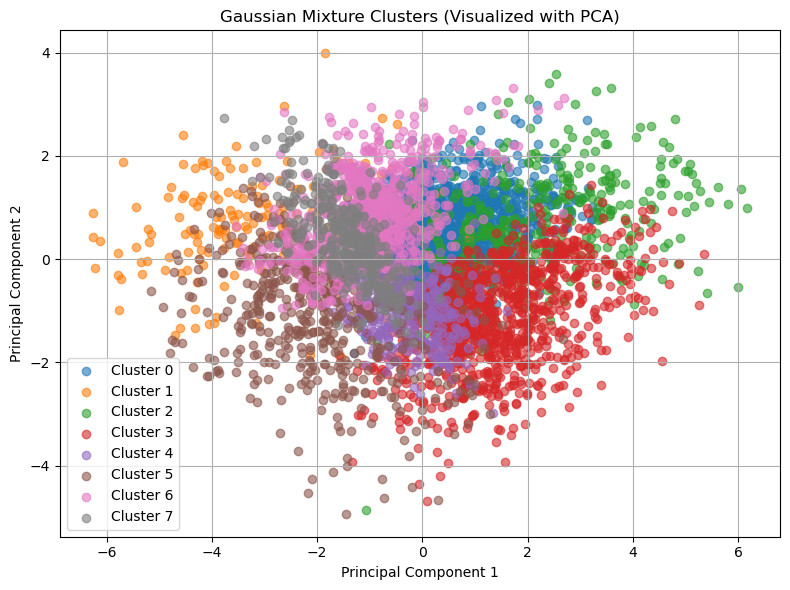

In [113]:
# Apply Gaussian Mixture Model (GMM) clustering to the selected dataset
model_gm_02 = gmm.fit_predict(df_02)

# Transform the dataset using PCA for visualization
pca_result = pca.transform(df_02)

# Create a DataFrame to store the PCA results and cluster labels
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_gm_02

# Plot the clusters in the PCA-reduced 2D space
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

# Add plot title and axis labels
plt.title("Gaussian Mixture Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add legend and grid for better readability
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### DATA to CSV

In [114]:
# Add cluster labels to the df_02 DataFrame
df_02["Cluster"] = model_km_02

# Display the first few rows of the updated DataFrame to verify
df_02.shape

C:\Users\abdul\AppData\Local\Temp\ipykernel_23396\2974013051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_02["Cluster"] = model_km_02


(5314, 21)

In [115]:
# cleaned_clustered_df.to_csv('Preprocessed_DF.csv')

In [116]:
# for cluster_id in cleaned_clustered_df['Cluster'].unique():
#     # Filter the DataFrame for this cluster
#     cluster_df = cleaned_clustered_df[cleaned_clustered_df['Cluster'] == cluster_id]
    
#     # Define filename, e.g., "cluster_0.csv"
#     filename = f"cluster_{cluster_id}.csv"
    
#     # Save to CSV
#     cluster_df.to_csv(filename, index=False)
#     print(f"Saved: {filename}")

### confirm shape of each csv

In [117]:
for id in sorted(cleaned_clustered_df['Cluster'].unique()):
    filename = f"C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/cluster_{id}.csv"
    df_id = pd.read_csv(filename)
    print(f"Cluster {id}: {df_id.shape}")

Cluster 0: (910, 98)
Cluster 1: (841, 98)
Cluster 2: (421, 98)
Cluster 3: (398, 98)
Cluster 4: (730, 98)
Cluster 5: (1031, 98)
Cluster 6: (569, 98)
Cluster 7: (414, 98)


# 3.3.1 Classification Model

C:\Users\abdul\AppData\Local\Temp\ipykernel_23396\3278694948.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI SCORE", y="Feature", data=mi_classif, palette="viridis")  # Create a horizontal bar plot


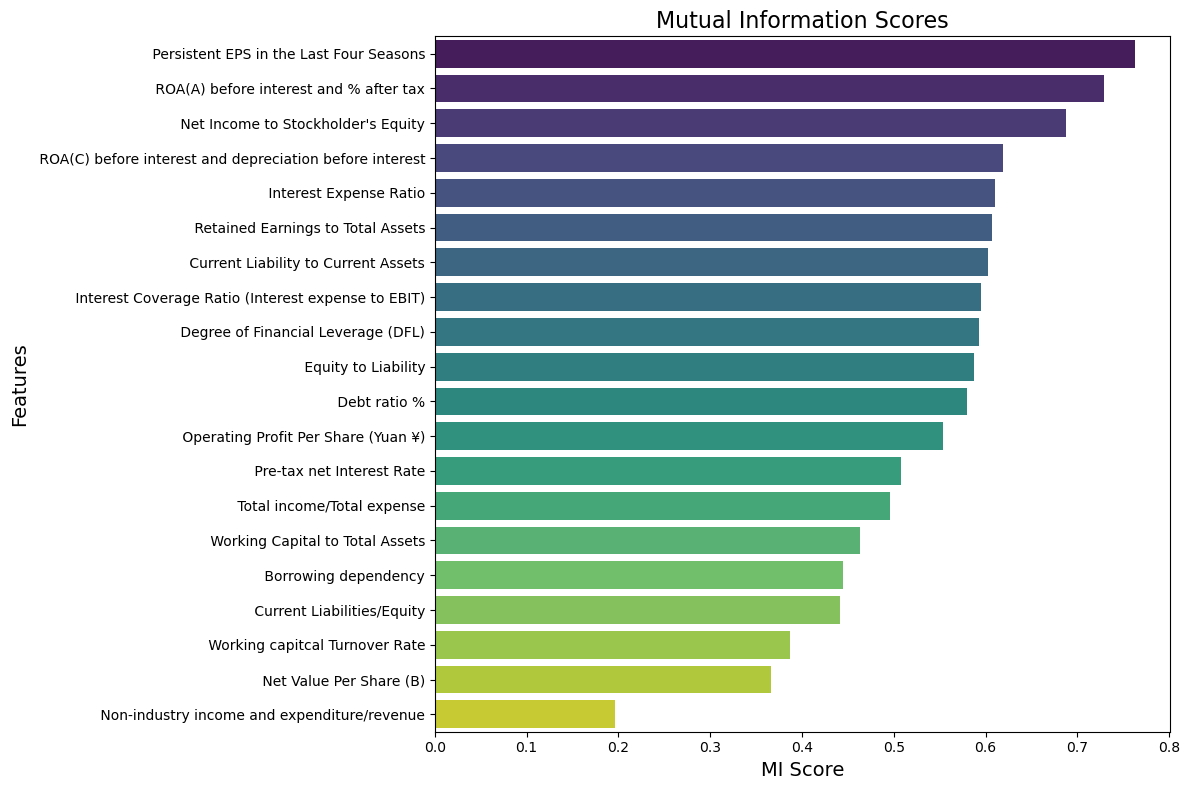

In [118]:
cluster_id = df_02["Cluster"]
df_02_temp = df_02.drop(columns=['Cluster'])

# Calculate mutual information scores between features and the target variable
mi_score_classif = mutual_info_classif(df_02_temp, cluster_id , random_state=42)

# Create a DataFrame to store features and their corresponding MI scores
mi_classif = pd.DataFrame({
    "Feature": df_02_temp.columns,  # Feature names
    "MI SCORE": mi_score_classif                # Corresponding MI scores
}).sort_values(by="MI SCORE", ascending=False)  # Sort by MI scores in descending order

# Improved plotting of mutual information scores
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x="MI SCORE", y="Feature", data=mi_classif, palette="viridis")  # Create a horizontal bar plot
plt.title("Mutual Information Scores", fontsize=16)  # Set the plot title
plt.xlabel("MI Score", fontsize=14)  # Label for the x-axis
plt.ylabel("Features", fontsize=14)  # Label for the y-axis
plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Display the plot

In [119]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_classif.sort_values(by="MI SCORE", ascending=False))


                                              Feature  MI SCORE
5             Persistent EPS in the Last Four Seasons  0.762420
1              ROA(A) before interest and % after tax  0.728665
16                 Net Income to Stockholder's Equity  0.687901
0    ROA(C) before interest and depreciation befor...  0.619546
7                              Interest Expense Ratio  0.610663
12                  Retained Earnings to Total Assets  0.607220
15                Current Liability to Current Assets  0.602752
18   Interest Coverage Ratio (Interest expense to ...  0.595382
17                 Degree of Financial Leverage (DFL)  0.592411
19                                Equity to Liability  0.587786
8                                        Debt ratio %  0.580256
6                 Operating Profit Per Share (Yuan ¥)  0.553988
2                           Pre-tax net Interest Rate  0.508135
13                         Total income/Total expense  0.495668
10                    Working Capital to

In [120]:
X_train , X_val , y_train , y_val  = train_test_split(df_02_temp, cluster_id , test_size=0.2, random_state=42)

In [121]:
clf_02 = RandomForestClassifier(random_state=42)
clf_02.fit(X_train , y_train )

RandomForestClassifier(random_state=42)

In [123]:
# Step 5: Evaluate performance
y_pred = clf_02.predict(X_val)
print("📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\n🧠 Classification Report:")
print(classification_report(y_val, y_pred))

📊 Confusion Matrix:
[[156   1   0   5   1   5   0   0]
 [  1 158   0   0   5   4   0   1]
 [  0   0  74   0   2   4   2   1]
 [  8   0   0  71   0   0   0   0]
 [  7   0   0   0 145   0   0   1]
 [ 10   2   7   0   2 195   3   0]
 [  4   0   5   2   0   6 105   0]
 [  0   6   1   0   2   0   0  61]]

🧠 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       168
           1       0.95      0.93      0.94       169
           2       0.85      0.89      0.87        83
           3       0.91      0.90      0.90        79
           4       0.92      0.95      0.94       153
           5       0.91      0.89      0.90       219
           6       0.95      0.86      0.91       122
           7       0.95      0.87      0.91        70

    accuracy                           0.91      1063
   macro avg       0.91      0.90      0.91      1063
weighted avg       0.91      0.91      0.91      1063



# EDA

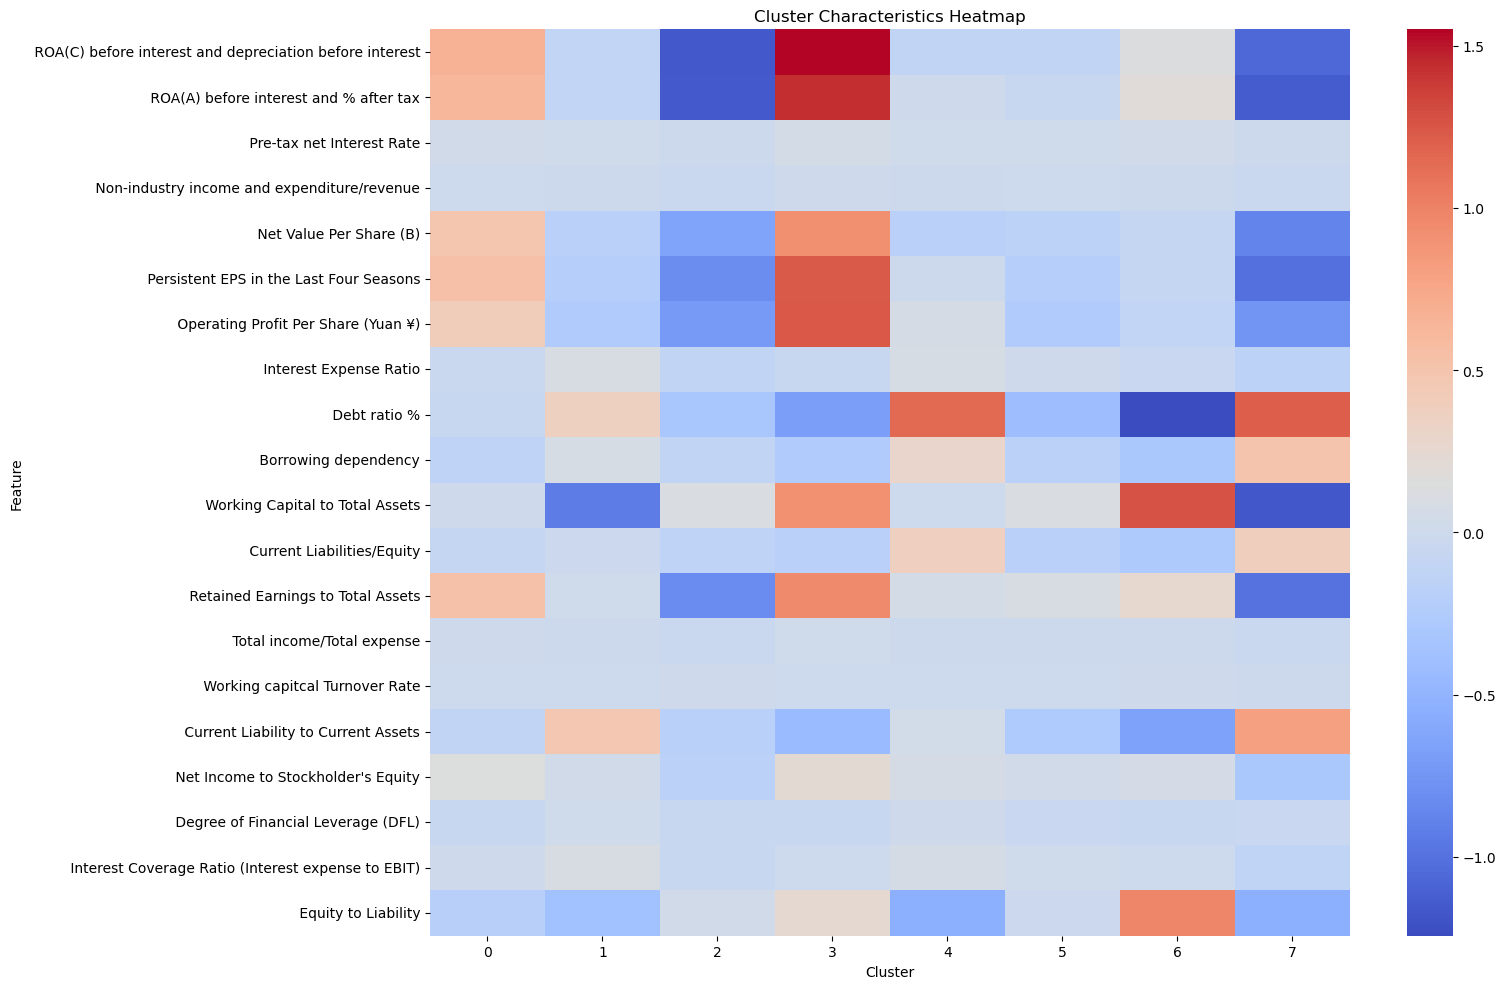

Cluster,0,1,2,3,4,5,6,7
ROA(C) before interest and depreciation before interest,0.677037,-0.105416,-1.162984,1.550119,-0.117990,-0.109105,0.142734,-1.062251
ROA(A) before interest and % after tax,0.633057,-0.100746,-1.149921,1.431875,0.011891,-0.063961,0.187644,-1.135891
Pre-tax net Interest Rate,0.031649,0.019933,-0.017471,0.044828,0.019077,0.020959,0.024361,-0.014205
Non-industry income and expenditure/revenue,-0.002577,-0.009932,-0.035031,0.006125,-0.015369,-0.009311,-0.010748,-0.042505
Net Value Per Share (B),0.481664,-0.178569,-0.632425,0.926978,-0.175502,-0.158043,-0.077226,-0.874150
Persistent EPS in the Last Four Seasons,0.538484,-0.215514,-0.816298,1.228548,-0.018263,-0.212640,-0.081685,-1.003455
Operating Profit Per Share (Yuan ¥),0.400475,-0.254392,-0.711236,1.241186,0.069169,-0.253686,-0.106608,-0.758471
Interest Expense Ratio,-0.038518,0.095073,-0.111352,-0.054942,0.083215,0.005315,-0.045002,-0.156061
Debt ratio %,-0.057735,0.371881,-0.305434,-0.682419,1.148863,-0.421908,-1.242584,1.207179
Borrowing dependency,-0.135233,0.086093,-0.110427,-0.255709,0.293627,-0.167806,-0.294060,0.507788


In [124]:
# Group the df_02 DataFrame by 'Cluster' and calculate the mean of each feature
cluster_characteristics = df_02.groupby("Cluster").mean()

# Transpose the DataFrame for easier visualization
cluster_characteristics = cluster_characteristics.T

# Plot a heatmap to visualize the characteristics of each cluster
plt.figure(figsize=(16, 10))
sns.heatmap(cluster_characteristics, annot=False, cmap="coolwarm", cbar=True)
plt.title("Cluster Characteristics Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display the transposed DataFrame for reference
display(cluster_characteristics)

(12,)


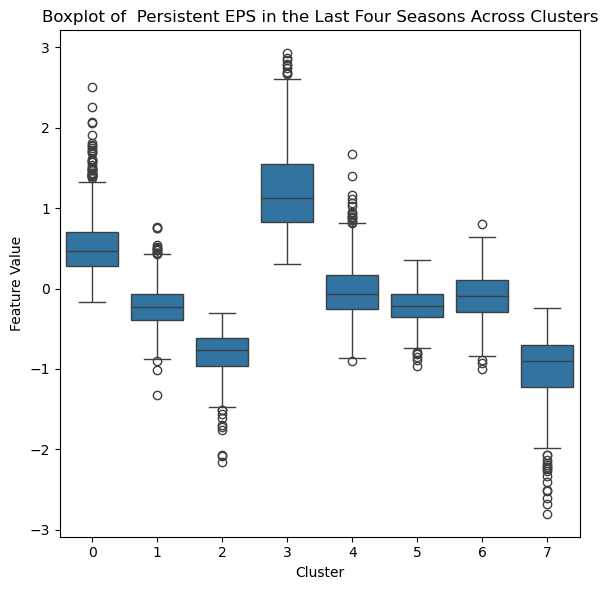

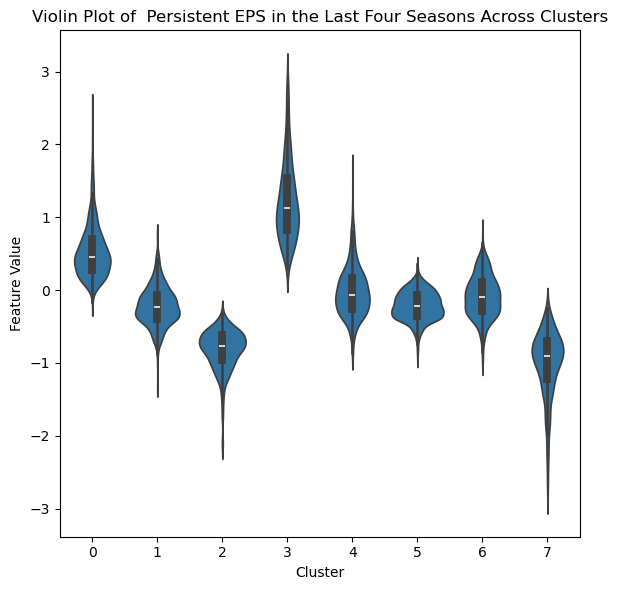

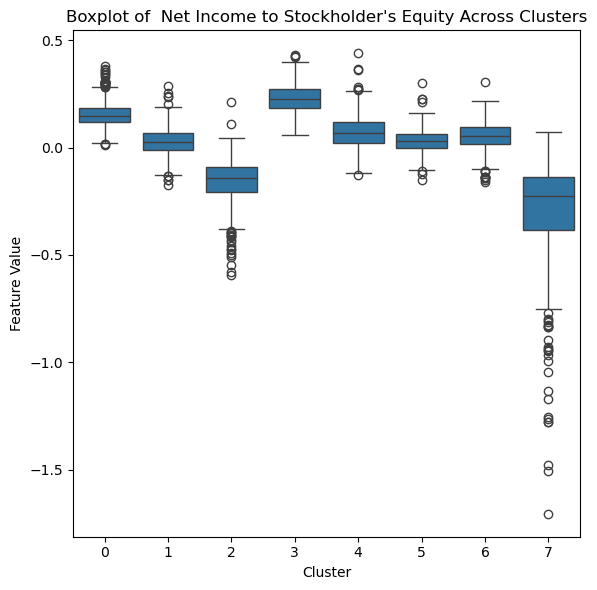

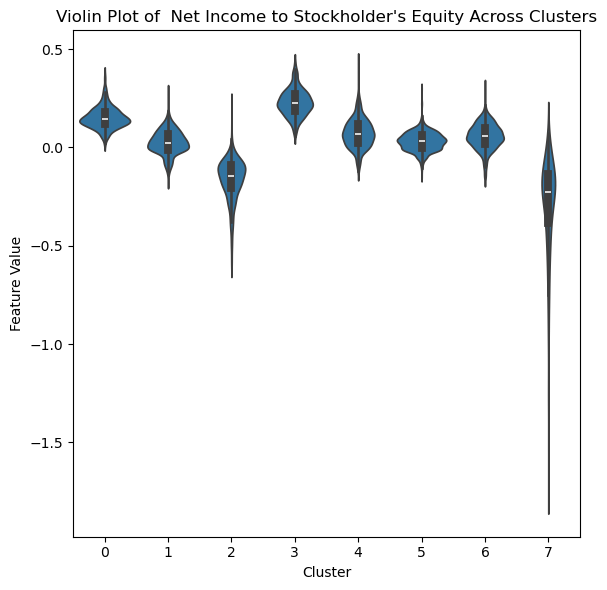

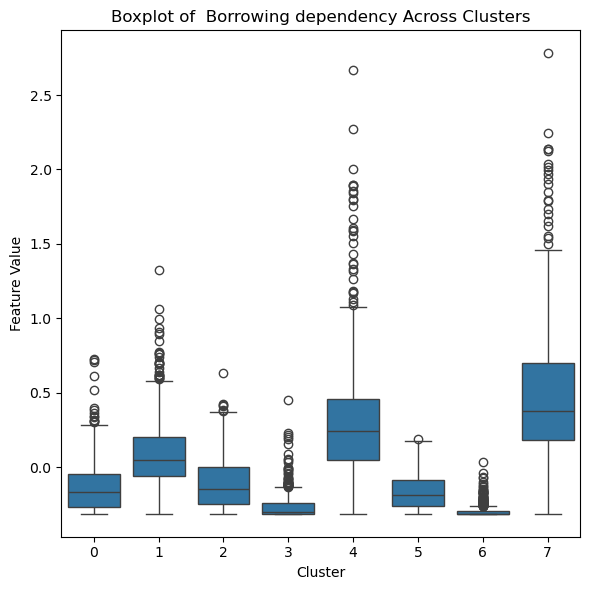

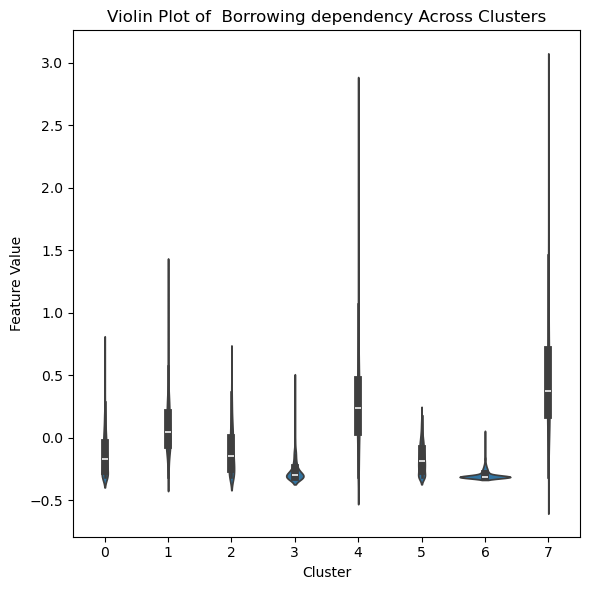

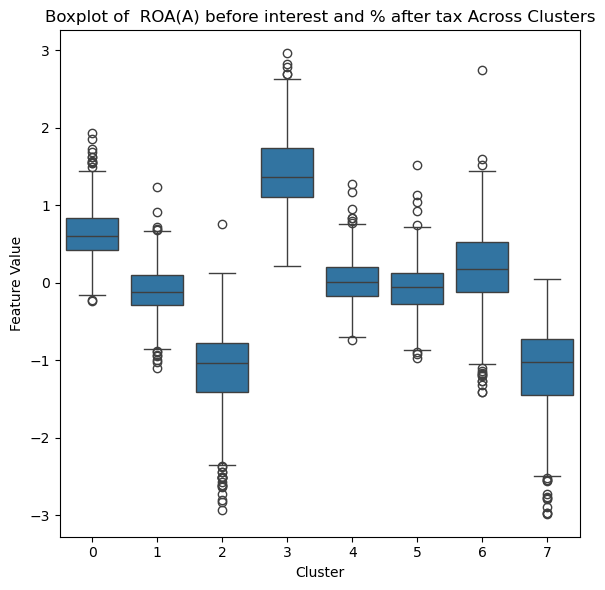

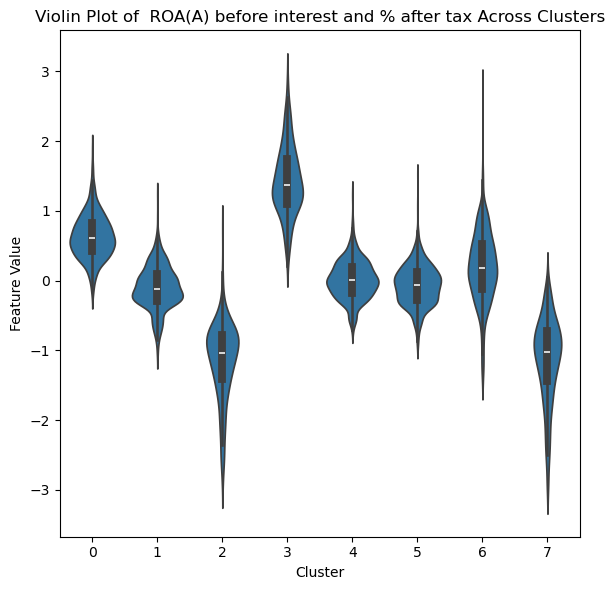

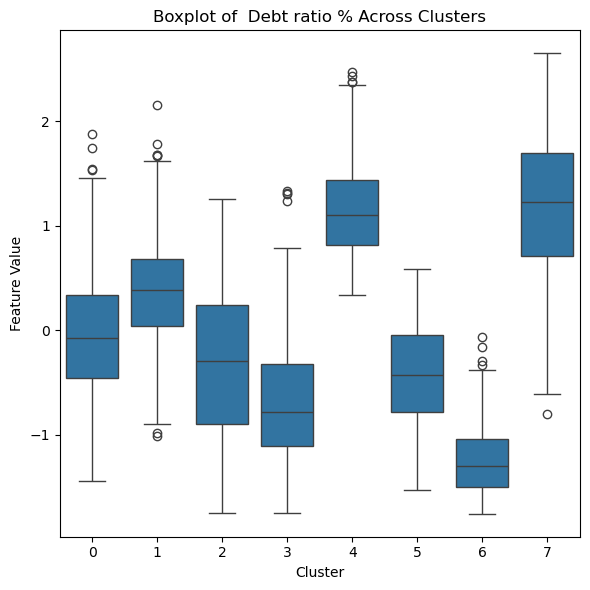

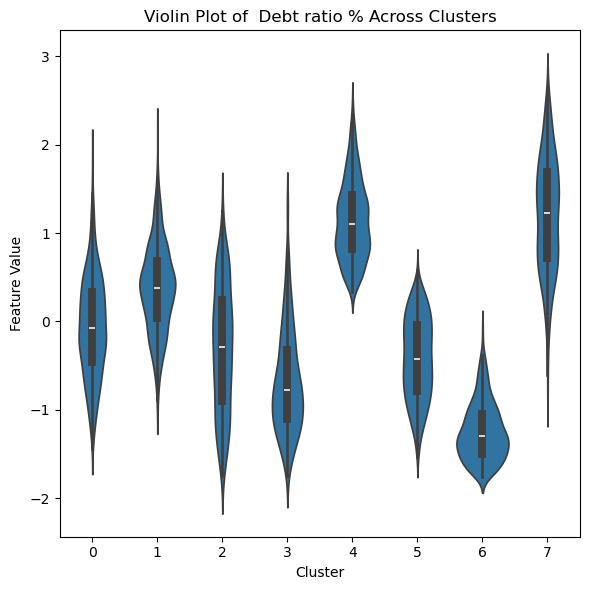

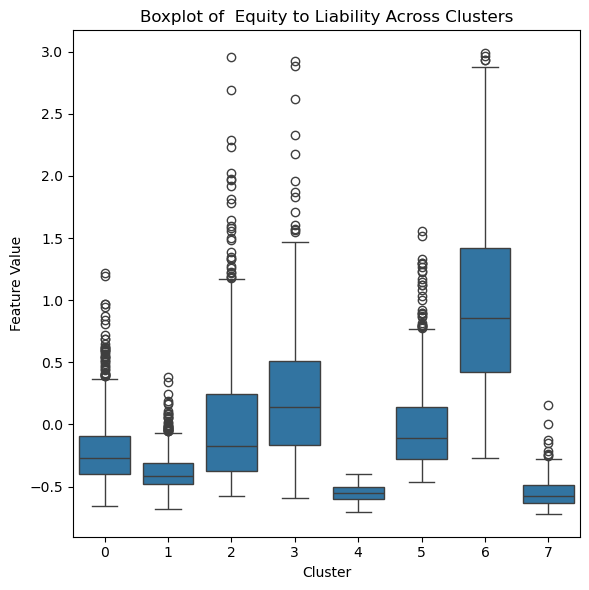

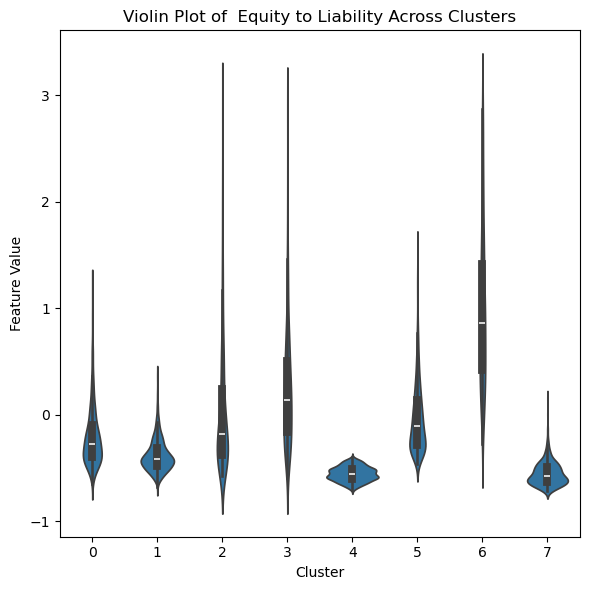

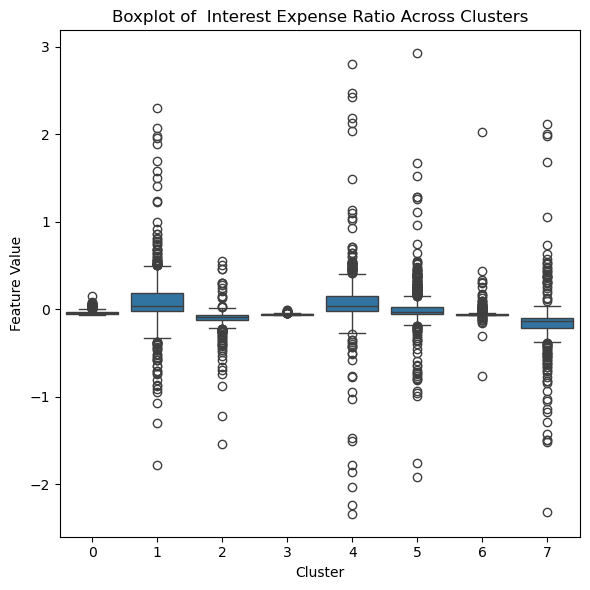

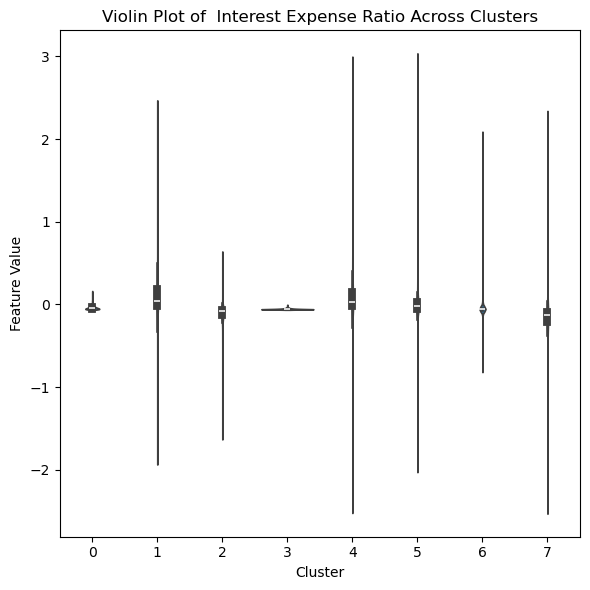

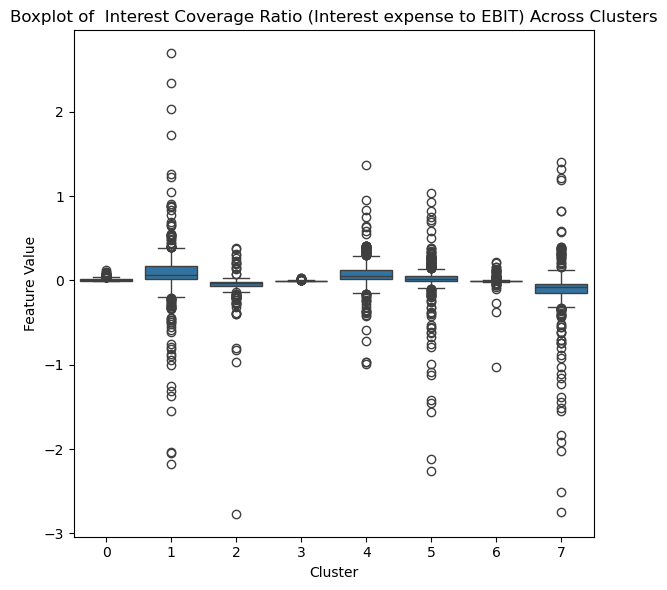

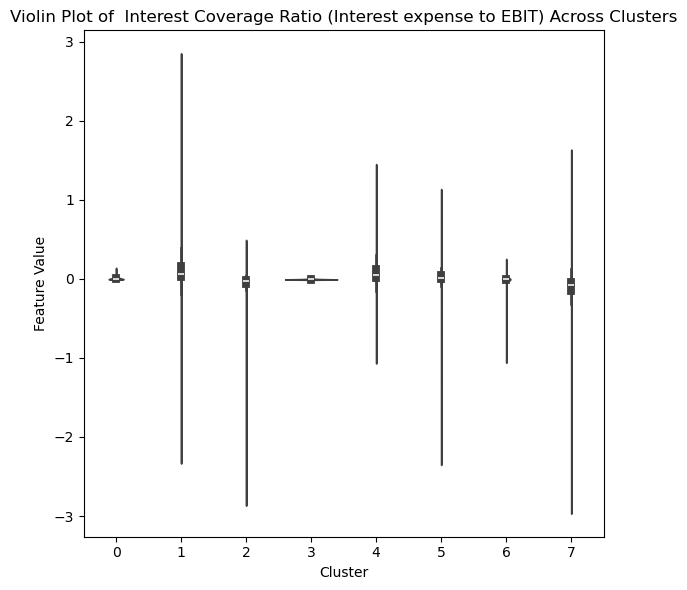

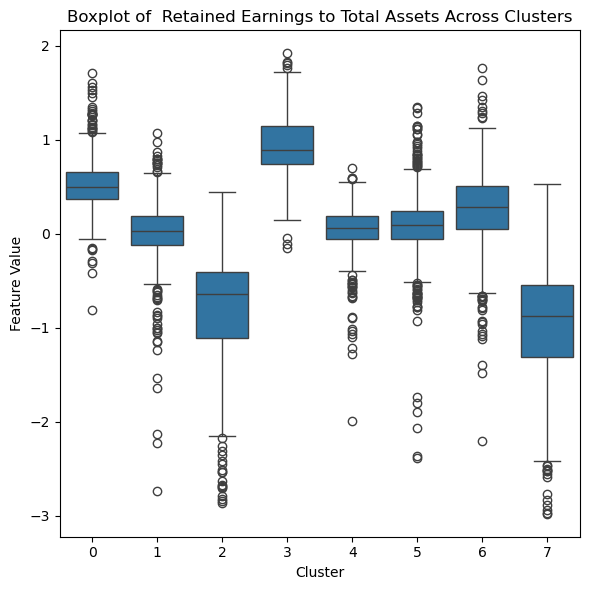

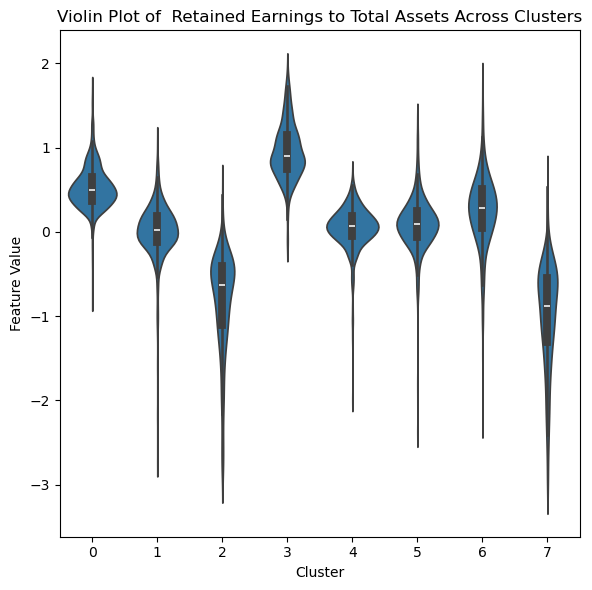

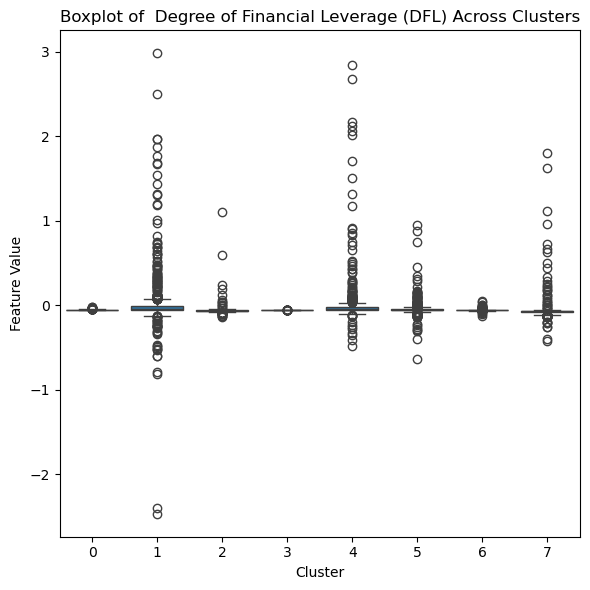

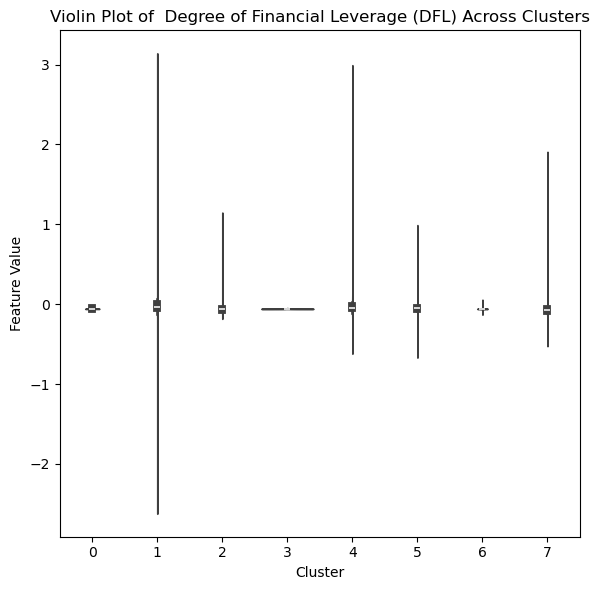

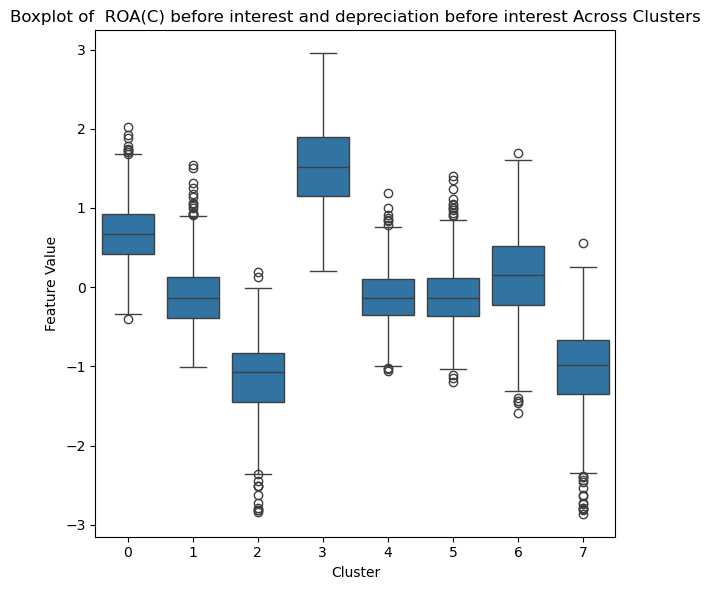

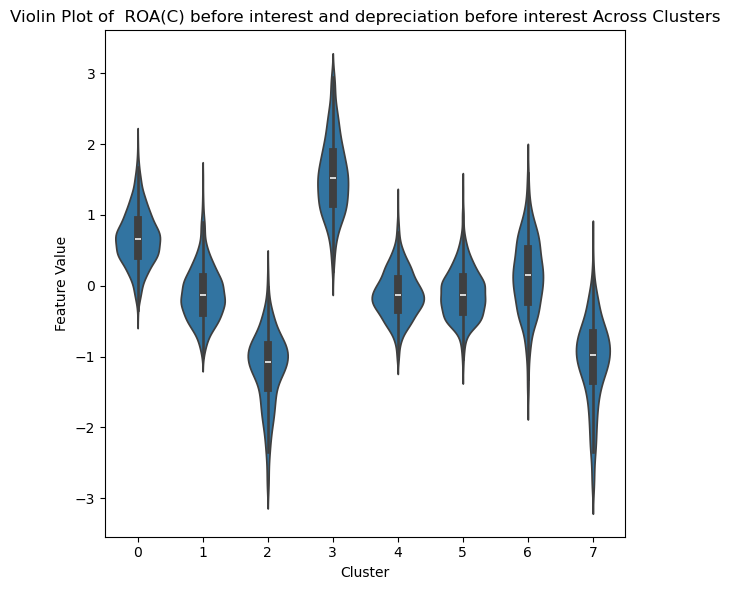

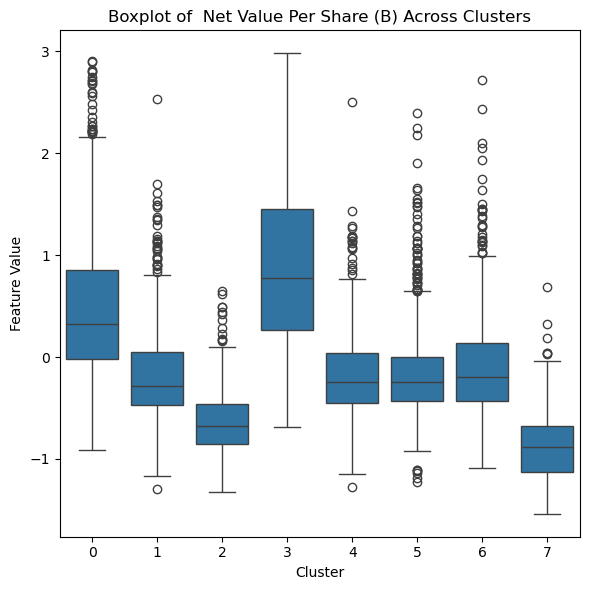

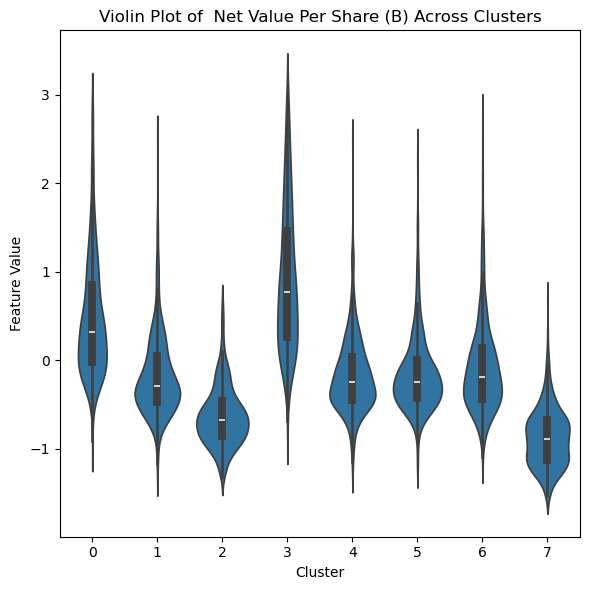

In [125]:
# Melt the DataFrame for easier plotting with seaborn
df_melted = df_02.reset_index().melt(id_vars=["Cluster"], var_name="Feature", value_name="Value")

# Filter the melted DataFrame to include only important features
mutual_info = mi_df[mi_df["MI SCORE"] >= 0.03]
important_features = mutual_info["Feature"].values
df_melted_filtered = df_melted[df_melted["Feature"].isin(important_features)]
print(important_features.shape)

# Iterate through each unique important feature
for feature in important_features:
    # Filter the melted DataFrame for the current feature
    feature_data = df_melted_filtered[df_melted_filtered["Feature"] == feature]
    
    # Set up the figure size for the boxplot
    plt.figure(figsize=(6, 6))
    
    # Create a boxplot for the current feature across clusters
    sns.boxplot(data=feature_data, x="Cluster", y="Value")
    plt.title(f"Boxplot of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Feature Value")
    plt.tight_layout()
    plt.show()
    
    # Set up the figure size for the violin plot
    plt.figure(figsize=(6, 6))
    
    # Create a violin plot for the current feature across clusters
    sns.violinplot(data=feature_data, x="Cluster", y="Value")
    plt.title(f"Violin Plot of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Feature Value")
    plt.tight_layout()
    plt.show()